In [63]:
import tensorflow as tf #pip-install tensorflow-gpu
import cv2 #opencv kutuphanesi
import os #dosya okuma
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [64]:
img_array = cv2.imread ("/Users/atiltanriverdi/archive/train/0/Training_983506.jpg")  #resmi okuyan dosya yolunu 

In [65]:
img_array.shape #rgb

(48, 48, 3)

In [66]:
print(img_array)

[[[242 242 242]
  [242 242 242]
  [239 239 239]
  ...
  [ 53  53  53]
  [ 32  32  32]
  [ 14  14  14]]

 [[241 241 241]
  [234 234 234]
  [224 224 224]
  ...
  [ 46  46  46]
  [ 20  20  20]
  [ 24  24  24]]

 [[228 228 228]
  [226 226 226]
  [218 218 218]
  ...
  [ 77  77  77]
  [ 14  14  14]
  [ 12  12  12]]

 ...

 [[110 110 110]
  [143 143 143]
  [140 140 140]
  ...
  [ 67  67  67]
  [ 61  61  61]
  [ 55  55  55]]

 [[107 107 107]
  [144 144 144]
  [139 139 139]
  ...
  [ 68  68  68]
  [ 58  58  58]
  [ 54  54  54]]

 [[113 113 113]
  [150 150 150]
  [138 138 138]
  ...
  [ 71  71  71]
  [ 54  54  54]
  [ 55  55  55]]]


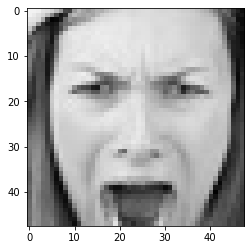

In [67]:
plt.imshow(img_array) #bgr

In [68]:
Veriyolu = "/Users/atiltanriverdi/archive/train/" # egitim dataseti

In [69]:
Siniflar = ["0","1","2","3","4","5","6"]  #siniflarin listesi klasorlerin adı Siniflar = ["angry","disgust","fear","happy","neutral","sad","surprise"]  #siniflarin listesi klasorlerin adı

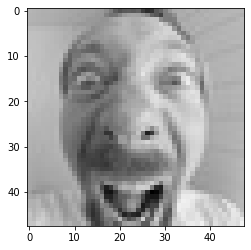

In [70]:
for category in Siniflar:
    path = os.path.join(Veriyolu, category) ##//
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break



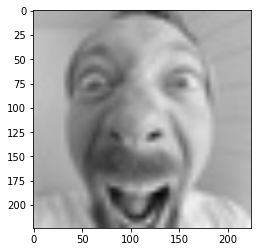

In [71]:
img_size = 224  ##resmin size ını değiştirmek için kullanılıan. kod blku  224x224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [72]:
new_array.shape 

(224, 224, 3)

In [73]:
#tüm resimleri oku ve diziye dönüştür



In [74]:
training_Data = [] #veriler dizisi
#ilk basta execute etmiyoruz once cunku fonksyonu cagırdıgımızda eğitmek için exectute edeceğiz
def create_training_Data(): #veri eğitim fonksyonu
    for category in Siniflar:
        path = os.path.join(Veriyolu, category)
        class_num = Siniflar.index(category) #0 1, # etiket
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [75]:
create_training_Data() #eğitim datasının yaratılması

In [76]:
print(len(training_Data))



28709


In [77]:
temp = np.array(training_Data)

/var/folders/x7/96rp_9jj1klfnm3y7zyx15x40000gn/T/ipykernel_34154/2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [78]:
temp.shape # 2 etiket ve data yı simgeliyor

(28709, 2)

In [79]:
#kamera örneği için eğitiyoruz

In [80]:
import random 

random.shuffle(training_Data)

In [81]:
X = [] #data /feature
y = [] #label

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, img_size, img_size, 3) # 4 boyutu dönüştürülmesi



In [82]:
X.shape #dosya sayısı # 3 kanalı ilk basta gorunen rakam dosya sayısı

(28709, 224, 224, 3)

In [83]:
#veriyi normallestirme

X = X/255.0; # normallestiriyoruz # scikit öğrenmesi

In [84]:
type(y)

list

In [85]:
y[0] ##00000001 00000010 00000100 bir tek cözümü

2

In [86]:
Y = np.array(y)



In [87]:
Y.shape

(28709,)

In [88]:
# egitim icin derin ogrenme modeli - transfer ogrenmesi

In [89]:
import tensorflow as tf #tensorflow ve kerasın import edilmesi
from tensorflow import keras
from tensorflow.keras import layers

In [90]:
model = tf.keras.applications.MobileNetV2() #ön eğitim modeli

In [91]:
 model.summary() #model versiyonunu görüntülüyoruz indirildiğinden emin oluyoruz

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [92]:
#Transfer öğrenmesi ayarllanan agırlıklar son checkpointten başlayacaktır.

In [93]:
base_input = model.layers[0].input #girdi

In [94]:
base_output = model.layers[-2].output # son satırı görmezden gelip sondan iki öncesini alıyoruz

In [95]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [96]:
final_output = layers.Dense(128)(base_output) # yeni katman ekleme global toplama katmanından çıktıdan sonra
final_output = layers.Activation('relu')(final_output) #aktivasyon fonksyonu
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output) #sinifların 07  #sınıflandırma katmanı 

In [97]:
final_output # çıktı

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

In [98]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [99]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [100]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [101]:
#history = new_model.fit(X,Y, epochs = 15) 

In [102]:
#new_model.save('Final_modelson.h5')

In [103]:
new_model = tf.keras.models.load_model('Final_modelson.h5')

In [104]:
new_model.evaluate #test data eğitim de kullanmayacagım webcam görüntü demosunda

<bound method Model.evaluate of <keras.engine.functional.Functional object at 0x7f7193b87e80>>

In [105]:
frame = cv2.imread("/Users/atiltanriverdi/archive/happyboy.jpg")

In [106]:
frame.shape

(802, 1424, 3)

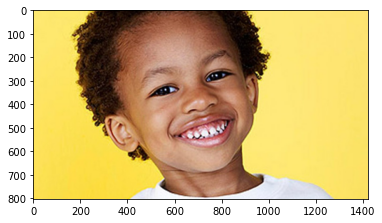

In [107]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [108]:
#YÜZ TANIMA ALGORITMASI (gri resimlerin) convert edeceğiz

In [109]:
faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [110]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [111]:
gray.shape

(802, 1424)

In [112]:
faces = faceCascade.detectMultiScale(gray, 1.1,4) #bir pencere veya resim icindeki coklu yüzleri bulmayı saglıyor
for x,y,w,h in faces:
    roi_gray = gray [y:y+h, x:x+w] 
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3) #open cv kodu kare olusturmak icin # karenin rengini ve thickness i belirler
    facess = faceCascade.detectMultiScale(roi_gray) 
    if len(facess) == 0:
        print("Yüz tespit edilemedi.")
    else:
        for  (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew] #sınırı renkli cizmek icin 

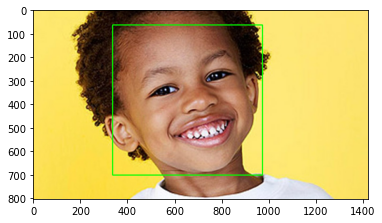

In [113]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #resmi dikdortgen içinde gosteriyruz

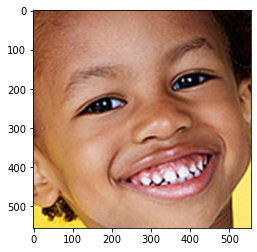

In [114]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)) # dikdortgen içindeki yüzün kesilmesi

In [115]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0 ) #dorduncu boyut lazım
final_image = final_image/255.0 #normallesitiriyoruz

In [116]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 844ms/step


In [117]:
Predictions[0]  #3. mutlu oluyor 0.12 ve 

array([8.4114645e-06, 5.4420810e-09, 1.8971316e-05, 9.9987984e-01,
       3.1052467e-05, 8.9391197e-06, 5.2726500e-05], dtype=float32)

In [118]:
np.argmax(Predictions)

3

In [ ]:
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python fullpackage
#from deepface import DeepFace ##pip install deepface
path = "/Users/atiltanriverdi/archive/haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
# kare arka planı beyaz yapma
rectangle_bgr = (255, 255, 255)
# siyah renk yap
img = np.zeros ((500, 500))
# syazı belirle
text = "Kutudaki yazı!"
# yazı kutusunda yüksekli ve genişlik alma
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# yazının baslangıc pozisyonu
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# iki pikselden oluşan küçük bir dolgu ile kutunun kodlarını yapılması
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(0) #kameranın tanımmalndıgı kod
#cap = cv2.VideoCapture("/Users/atiltanriverdi/archive/surpiseman.jpeg") #video konumu

# Check if the webcam is opened correctly

#if not cap.isOpened():
#    cap = cv2.VideoCapture(0)
#if not cap.isOpened():
#    raise I0Error ("Webcam acilamiyor")
    
while True:
    ret, frame = cap.read()

    #result = DeepFace.analyze(frame, actions = ['emotion'])

    #eye cascade = cv2. CascadeClassifier(cv2. data. haarcascades +'haarcascade eye.xml')

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade. empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4) #bir pencere veya resim icindeki coklu yüzleri bulmayı saglıyor
    for x,y,w,h in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color= frame[y:y+h, x: x+w]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            faces = faceCascade.detectMultiScale(roi_gray)
            if len(facess)== 0:
                print("Face not detected")
            else:
                for (ex,ey, ew,eh) in facess:
                    face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## yüzün kesilmesi 
    
    final_image = cv2.resize(face_roi, (224,224))
   
    
    final_image = np.expand_dims (final_image,axis =0) ## dorduncu boyuta ihtiyacımız var
    final_image= final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX

    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN


    if (np.argmax(Predictions)==0):
        status = "Angry"

        x1,y1,w1,h1 = 0,0,175,75
        # arkadaki siyah kare cizimi

        cv2.rectangle (frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # eklenen yazıların özellikleri renginin belirlenmesi

        cv2.putText (frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax (Predictions)==1):
        status = "Disgust"

        x1,y1,w1,h1 = 0,0,175,75
        # arkadaki siyah kare cizimi

        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # eklenen yazıların özellikleri renginin belirlenmesi

        cv2.putText (frame, status, (x1 + int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255),2, cv2.LINE_4)
        
    elif (np.argmax (Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
          # arkadaki siyah kare cizimi

        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
          # eklenen yazıların özellikleri renginin belirlenmesi

        cv2.putText (frame, status, (x1 + int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255),2, cv2.LINE_4)
        cv2.rectangle (frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==3):
        status = "Happy"

        x1,y1,w1,h1 = 0,0,175,75
        # arkadaki siyah kare cizimi

        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Aeklenen yazıların özellikleri renginin belirlenmesi

        cv2.putText (frame, status, (x1 + int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==6):
        status = "Sad"

        x1, y1, w1,h1 = 0,0,175,75
       # arkadaki siyah kare cizimi

        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

       #eklenen yazıların özellikleri renginin belirlenmesi
        cv2.putText(frame, status, (x1 + int (w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle (frame, (x, y), (x+w, y+h), (0, 0, 255)) 
        
    elif (np.argmax (Predictions)==5):
        status = "Surprise"

        x1,y1,w1,h1 = 0,0,175,75
        # arkadaki siyah kare cizimi
        cv2.rectangle (frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # eklenen yazıların özellikleri renginin belirlenmesi
        cv2.putText (frame, status, (x1 + int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255),2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    else: 
        status = "Neutral"

        x1,y1,w1,h1 = 0,0,175,75

        # arkadaki siyah kare cizimi

        cv2. rectangle (frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # eklenen yazıların özellikleri renginin belirlenmesi
        cv2. putText (frame, status, (x1 + int (w1/10),y1 + int(h1/2)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        cv2.putText (frame, status, (100, 150), font, 3, (0, 255,0),2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255,0))

        #while True:

        #    ret, frame = cap.read()
        #    cv2.imshow('img', frame)
        #    if cv2.waitKey(30) & 0xff == ord('q'):
        #        break

        #cap.release()
        #cv2.destroyAllWindows()
    #else:
    #    print("Alert ! Camera disconnected")


    cv2.imshow('yuz duygu tanima', frame) #acılan pencerenin isimlenidrimesi

    if cv2.waitKey(1) & 0XFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 36ms/step
